In [1]:
!pip install -U -q PyDrive

In [2]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest
from sklearn.cluster import DBSCAN
from sklearn.model_selection import TimeSeriesSplit
from sklearn.svm import OneClassSVM
from sklearn.impute import KNNImputer

In [3]:
# # Code to read csv file into Colaboratory:
# # Authenticate and create the PyDrive client.
#auth.authenticate_user()
#gauth = GoogleAuth()
#gauth.credentials = GoogleCredentials.get_application_default()
#drive = GoogleDrive(gauth)
from google.colab import drive
drive.mount('/content/drive')
# !ls "/content/drive/My Drive/Anomaly Detection/Test Data"
dataset_1_unsorted = pd.read_csv('/content/drive/My Drive/Data/CNN/Peter_Raw/s01_EEG_hp_notch.csv', header= None)
print(dataset_1_unsorted.shape)
# Dataset is now stored in a Pandas Dataframe

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
(200, 98304)


In [4]:
x_initial = dataset_1_unsorted.T[0]
x_list = np.split(x_initial, 64)
x = np.array(x_list[16])
print(x.shape)
# x = np.reshape(x_initial[0,0:1536],(1,1536))

(1536,)


In [5]:

X_flatten = x.reshape(x.shape[0],1)

Local outlier factor(LOF) Method:

In [6]:
clf = LocalOutlierFactor(contamination=0.01)
pred = clf.fit_predict(X_flatten)

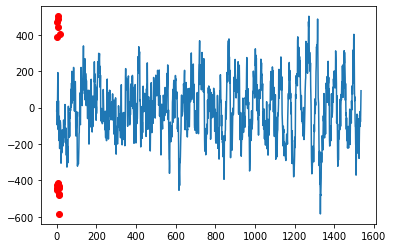

In [7]:
orig = plt.plot(x)
outlier = plt.plot(x[pred==-1],'ro')


Isolation Forest Method:

In [8]:
clf=IsolationForest(behaviour='new',contamination=0.05)
pred=clf.fit_predict(X_flatten)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_iforest.py:248: FutureWarning: 'behaviour' is deprecated in 0.22 and will be removed in 0.24. You should not pass or set this parameter.
  FutureWarning


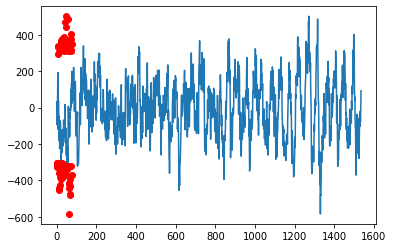

In [9]:
plt.plot(x)
plt.plot(x[pred==-1],'ro')

One-class SVM:

In [10]:
outlier_ratio = 0.1
clf = OneClassSVM(nu=0.2 * outlier_ratio + 0.05,kernel="rbf",gamma=0.05).fit(X_flatten)
pred = clf.predict(X_flatten)

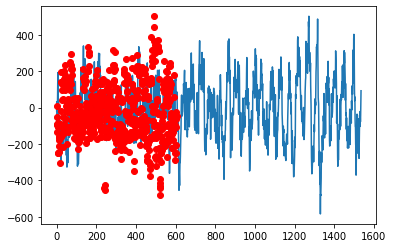

In [12]:
plt.plot(x)
plt.plot(x[pred==-1],'ro')